In [1]:
from datasets import load_dataset
from bertopic import BERTopic
import pandas as pd 
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk
import re
from nltk.stem.snowball import SnowballStemmer
import spacy
from sklearn.decomposition import LatentDirichletAllocation, NMF
import matplotlib.pyplot as plt

In [2]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 5, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]

        ax = axes[topic_idx]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {topic_idx +1}", fontdict={"fontsize": 30})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=20)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=40)

    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

In [3]:
piaf_dataset = load_dataset('piaf', split="train")
df_piaf = piaf_dataset.to_pandas()
piaf_context = list(df_piaf.context.unique())



min_topic_length = 3
stemmer = SnowballStemmer(language='french')
spacy_stemmer = spacy.load('fr_core_news_md')
def tokenize_and_stem(text):
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = [token for token in tokens if re.search('[a-zA-Z]', token)]
    stems = [spacy_stemmer(t)[0].lemma_ for t in filtered_tokens if len(t) > min_topic_length]
    return stems

final_stopwords_list = stopwords.words('english') + stopwords.words('french')
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000, min_df=0.2, stop_words=final_stopwords_list, use_idf=True, tokenizer=tokenize_and_stem)

X = tfidf_vectorizer.fit_transform(piaf_context)
lda = LatentDirichletAllocation(n_components=5, learning_method="online", random_state=0)
topics = lda.fit_transform(X)

Reusing dataset piaf (/Users/ytadjota/.cache/huggingface/datasets/piaf/plain_text/1.0.0/535c60f4155fe1d644c1746e86131963c082f309d0dbb5ba4d606786c7f4a6ae)


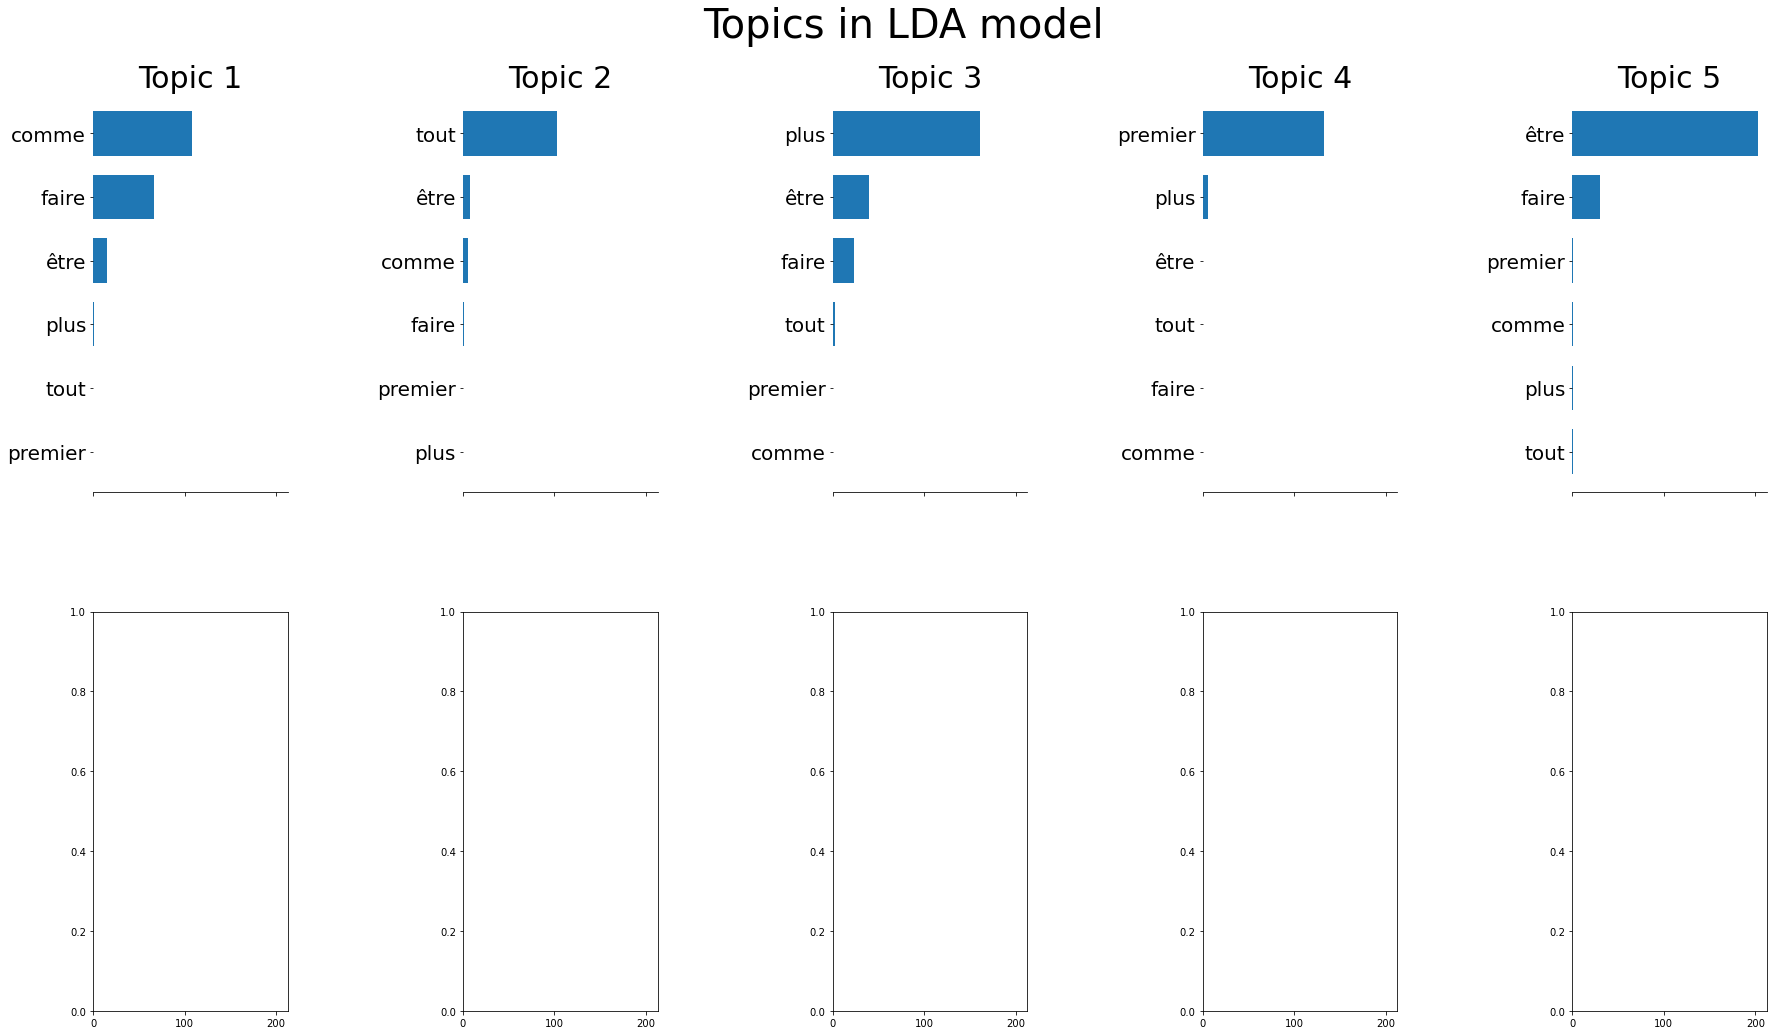

In [4]:
plot_top_words(lda, tfidf_vectorizer.get_feature_names_out(), 10, "Topics in LDA model")

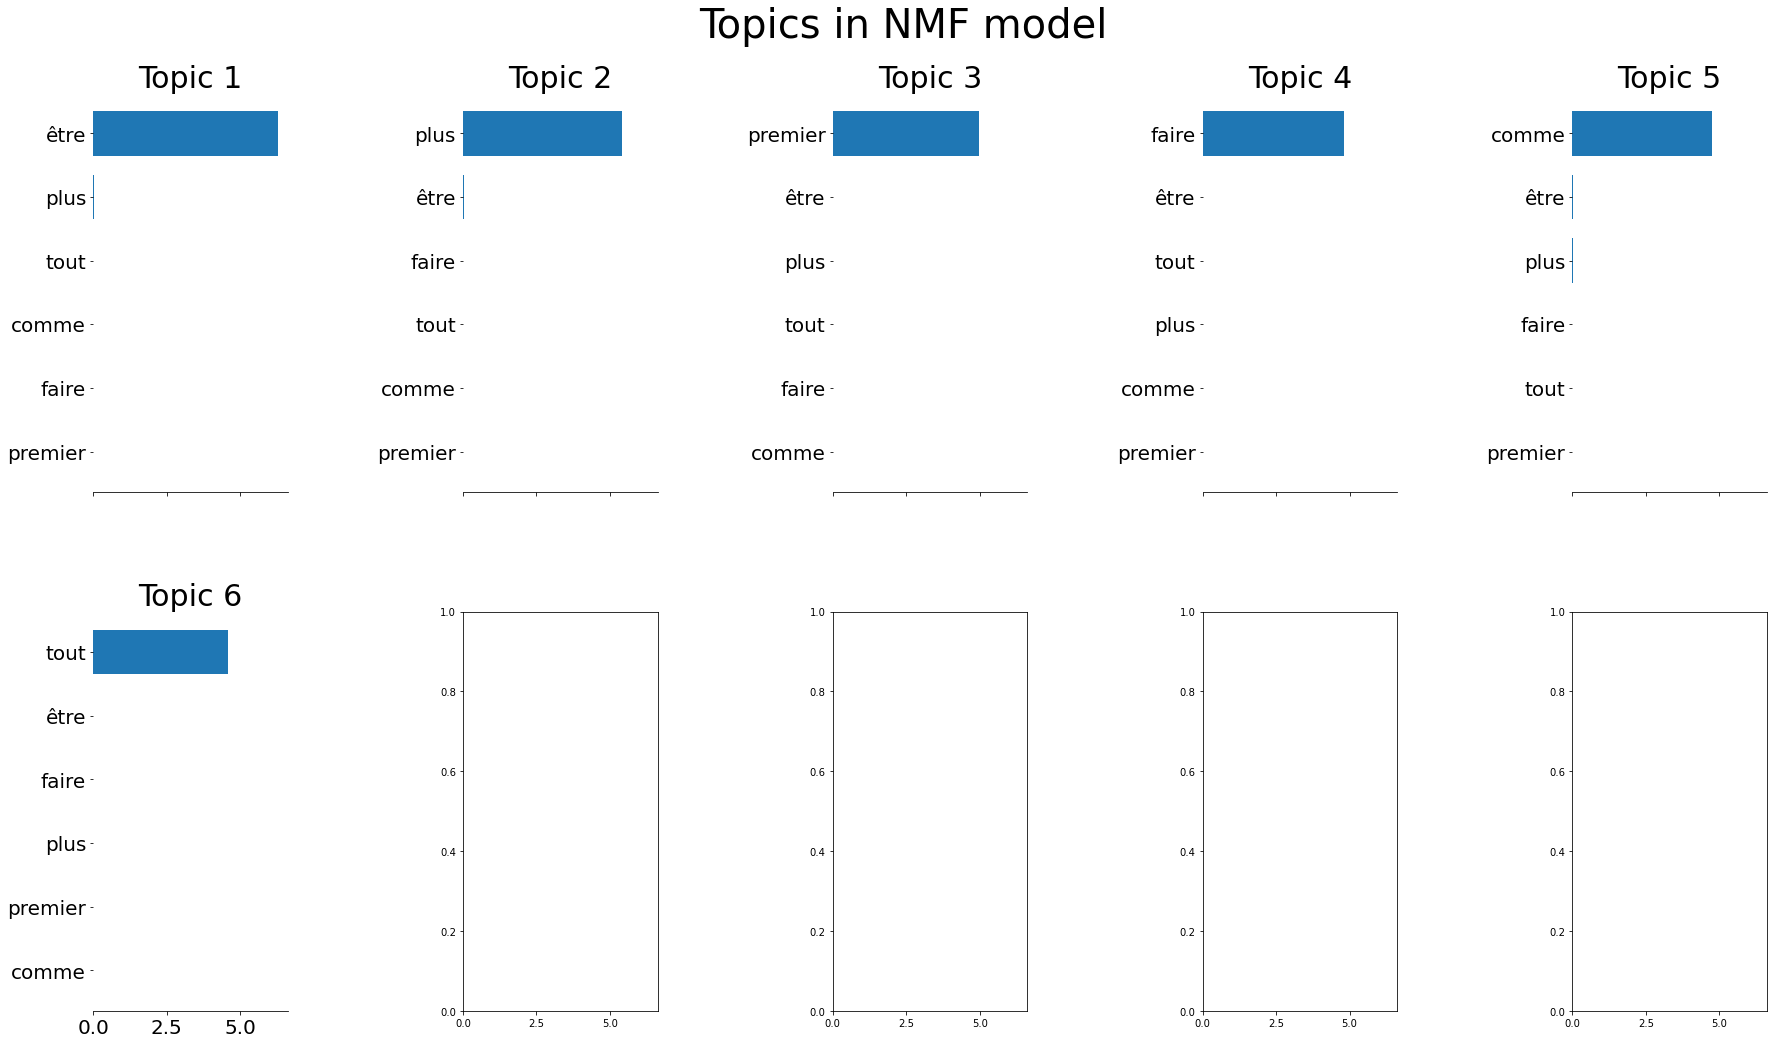

In [7]:
from sklearn.decomposition import LatentDirichletAllocation, NMF
nmf = NMF(random_state=1, alpha=0.1, l1_ratio=0.5).fit(X)
plot_top_words(nmf, tfidf_vectorizer.get_feature_names_out(), 10, "Topics in NMF model")

In [ ]:
from tranformers import 